# Overview of Notebook

This notebook is split into 3 sections
- Importing of Libraries and reading of article(s) data
- Processing the article(s) data and scoring it based on a predefined risk scoring framework
- Plotting the article(s) data in a 3D Risk Scoring Cube

Outputs:
- CSV file with 3 additional columns: "test.csv"
    - New Severity Score
    - New Human Control Score
    - New Likelihood Score
- A image of the 3D Risk Scoring Cube: "3D_Risk_Scoring_Cube.png"
    

# Importing Libraries and Reading Data

In [40]:
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [5]:
df = pd.read_csv("Consolidated_News_Articles_With_Sentiment_Labels.csv")
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


# Risk Scoring Framework Adapted from McKinsey Research Report

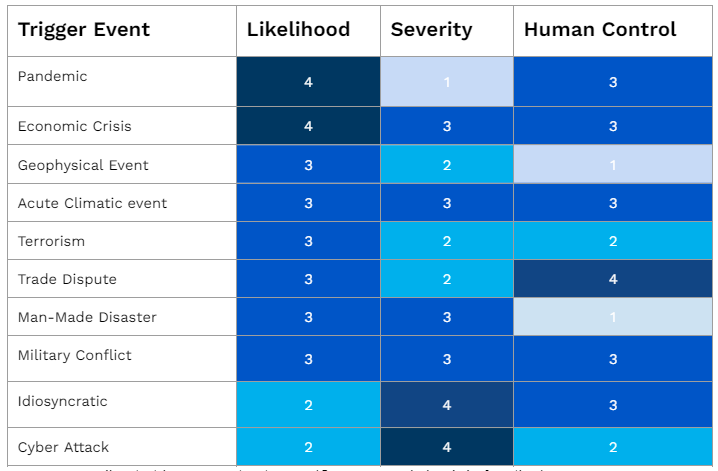

# Creating Initial Likelihood, Severity and Human Control Score

- Scoring is done based on the trigger event associated with the individual risk scores from the risk scoring framework mention above

In [8]:
def create_likelihood_score(x):
    if x == 'idiosyncratic':
        return 2
    elif x == 'geophysical event':
        return 3
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 3
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 4
    elif x == 'pandemic':
        return 4
    elif x == 'Trade Dispute':
        return 3
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3
        
def create_human_control_score(x):
    if x == 'idiosyncratic':
        return 3
    elif x == 'geophysical event':
        return 1
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 3
    elif x == 'Trade Dispute':
        return 4
    elif x == 'Man-Made Disaster':
        return 1
    else:
        return 3
    
def create_severity_score(x):
    if x == 'idiosyncratic':
        return 4
    elif x == 'geophysical event':
        return 2
    elif x == 'cyberattack':
        return 4
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 1
    elif x == 'Trade Dispute':
        return 2
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3

In [9]:
df['Likelihood Score'] = df['new_class_name'].apply(create_likelihood_score)
df['Severity Score'] = df['new_class_name'].apply(create_severity_score)
df['Human Control Score'] = df['new_class_name'].apply(create_human_control_score)

In [10]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1


# Finetuning Severity Score

In [13]:
df['New Severity Score'] = df['Severity Score']

In [14]:
for i in range(len(df)):
    severity_score = df["Severity Score"].loc[i]
    sentiment_label = df["sentiment label"].loc[i]
    compound_score = df["compound score"].loc[i]
    
#     print(compound_score)
    
    if sentiment_label == "negative":
#         print(compound_score)
        compound_score = -compound_score
        mid = compound_score + severity_score
#         print(f"{sentiment_label}: {test}")
        if mid > 4:
            mid = 4
        df["New Severity Score"].loc[i] = mid
    elif sentiment_label == "positive":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {test}")
        df["New Severity Score"].loc[i] = severity_score - compound_score 
    elif sentiment_label == "neutral":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {severity_score}")
        df["New Severity Score"].loc[i] = severity_score

        
    

C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df['New Severity Score'].value_counts()

3.0000    1754
4.0000    1707
2.0000     582
1.0000     337
3.7003      50
          ... 
2.0136       1
3.9457       1
1.6240       1
1.0326       1
3.9909       1
Name: New Severity Score, Length: 2098, dtype: int64

# Finetuning Human Control Score

In [28]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

edited_stopwords = stopwords
for i in stopwords.copy():
    if i == 'not':
        edited_stopwords.remove(i)
        
        
def preprocess(text):
    

    text = re.sub('\r\n', " ", str(text))
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'[^\w\s]', '', str(text))
#     text = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    token = word_tokenize(text)
    

    words = [t for t in token if t not in edited_stopwords]
    
#     return_text = " "
    
#     return_text = return_text.join(words)
    
    return words

In [22]:
df['new content summary'] = df['content summary'].apply(preprocess)

In [23]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed..."
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o..."
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo..."
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775,"[new, delhi, reuters, himalayan, avalanche, tr..."
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509,"[salt, lake, city, nytimes, four, backcountry,..."


In [24]:
df['mid_working'] = df['new content summary']

In [27]:
df['New Human Control Score'] = df['Human Control Score']

### Adding/Deleting Key Words Associated with Human Control

- The code block below is editable, such as adding more words as well as the magnitude of change that is caused by these words being present in the article summary itself

In [29]:
decrease_human_control_words = {0.2:['foreseeable','anticipated','predictable','planned'], 0.3:["expected"]}

increase_human_control_words = {0.2:['unforeseeable','unexpected','unpredictable','unanticipated','unplanned']}

list_of_inverter_words = ['not']

### Main Function to Finetune Human Control Score

In [30]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in decrease_human_control_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned = initial_human_control_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned = initial_human_control_score - key
                    word = t

            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{word} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['New Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in increase_human_control_words.items():
            if t in value:
                to_be_returned = initial_human_control_score + key
#                 print(to_be_returned)
                
                
    
            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
    


expected found at index 17
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 35
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 114
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
expected found at index 120
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 121
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 129
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 204
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
not expected
not expected found at index 222
Intial Human Control Score: 1
Edited Human Control Score: 1.3
/
expected found at index 263
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 275
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 363
Intial Human Control Score: 1
Edited Huma

C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 1997
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 1997
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2004
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2006
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2014
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2022
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2027
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2027
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2029
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2035
Intial Human Control Score: 3
Edite

expected found at index 2613
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2620
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2646
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2648
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2648
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2649
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2651
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2652
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2653
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2659
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2668
Intial 

Intial Human Control Score: 3
Edited Human Control Score: 3.3
/
not expected
not expected found at index 3984
Intial Human Control Score: 3.3
Edited Human Control Score: 3.5999999999999996
/
expected found at index 3997
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4075
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4091
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4091
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
anticipated found at index 4120
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
anticipated found at index 4121
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 4129
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 4131
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
not expected
not expected found at index 41

expected found at index 5437
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5485
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5525
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5530
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5532
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5537
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5576
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5596
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
anticipated found at index 5603
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 5604
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5616
Intial Human Control Score: 3
Edited H

expected found at index 6713
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6718
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6722
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6731
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6737
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6741
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6742
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6744
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6745
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6748
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6755
Intial Human Control Score: 3
Edited Huma

expected found at index 7440
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7458
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7479
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7514
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7540
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7549
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7551
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7578
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
not expected
not expected found at index 7586
Intial Human Control Score: 3
Edited Human Control Score: 3.3
/
anticipated found at index 7597
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
planned found at index 7623
Intial Human Control S

planned found at index 11139
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
expected found at index 11140
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
planned found at index 11154
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
planned found at index 11156
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
planned found at index 11158
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
expected found at index 11159
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
expected found at index 11161
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
expected found at index 11161
Intial Human Control Score: 3.7
Edited Human Control Score: 3.4000000000000004
/
expected found at index 11169
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
planned found at index 11172
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
expected found at index 11178
Intial Human Contr

unplanned found at index 1700
Intial Human Control Score: 2.0
Edited Human Control Score: 2.2
/
unexpected found at index 2225
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpected found at index 2385
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpected found at index 2385
Intial Human Control Score: 3.2
Edited Human Control Score: 3.4000000000000004
/
unpredictable found at index 2448
Intial Human Control Score: 2.7
Edited Human Control Score: 2.9000000000000004
/
unpredictable found at index 2733
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpected found at index 3045
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unplanned found at index 3567
Intial Human Control Score: 3.0
Edited Human Control Score: 3.2
/
unexpected found at index 3692
Intial Human Control Score: 2.7
Edited Human Control Score: 2.9000000000000004
/
unpredictable found at index 3795
Intial Human Control Score: 3.0
Edited Human

In [31]:
df['New Human Control Score'].value_counts()

3.0    8073
2.0    2058
1.0    1893
4.0     751
2.7     495
2.8      83
2.4      66
0.7      55
1.8      54
1.7      41
3.2      40
3.7      29
3.8      21
0.8      17
3.3      10
2.1       9
1.4       6
3.6       5
2.9       5
2.2       4
1.2       4
2.6       4
2.5       3
3.4       3
3.5       3
1.8       2
0.4       2
1.6       2
1.5       2
0.6       2
0.5       1
2.4       1
1.3       1
3.1       1
3.9       1
Name: New Human Control Score, dtype: int64

# Finetuning Likelihood Score

In [35]:
df['New Likelihood Score'] = df['Likelihood Score']  -1

### Adding/Deleting Key Words Associated with Human Control

- The code block below is editable, such as adding more words as well as the magnitude of change that is caused by these words being present in the article summary itself

In [44]:
decrease_likelihood_words = {0.2: ['improbable'], 0.3: ['unlikely']}
increase_likelihood_words = {0.2: ['likely','probable','cameron','highlands','johor'], 1:['malaysia']}
list_of_inverter_words = ['not']

### Main Function to Finetune Likelihood Score

In [37]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in decrease_likelihood_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned2 = initial_likelihood_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned2 = initial_likelihood_score - key
                    word = t
                    
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['New Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in increase_likelihood_words.items():
            if t in value:
                
                position = list_of_words.index(t)
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                    to_be_returned2 = initial_likelihood_score - key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                    
                else:
                    to_be_returned2 = initial_likelihood_score + key
                    word = t
            
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
    


unlikely found at index 19
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 20
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 172
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 309
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 312
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 578
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 580
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 782
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 812
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 831
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 967
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 1639
Intial Likelihood Score: 2


unlikely found at index 13145
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
likely found at index 25
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 31
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 109
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 142
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 170
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 171
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 199
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 268
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 271
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 291
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 291
Intial Likelihood Score: 2.2

/
likely found at index 2499
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 2499
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 2518
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 2547
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
likely found at index 2551
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 2570
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 2571
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 2606
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 2606
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 2606
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 2657
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at inde

Edited Likelihood Score: 3.4000000000000004
/
malaysia found at index 4123
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
likely found at index 4136
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4137
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4137
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
malaysia found at index 4154
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 4154
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 4155
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 4155
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
likely found at index 4196
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4246
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4254
Intial Likelihood Score: 2.0
Edi

likely found at index 5437
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 5442
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 5442
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 5467
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5469
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5471
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5481
Intial Likelihood Score: 3.7
Edited Likelihood Score: 3.9000000000000004
/
likely found at index 5485
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5490
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5501
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 5547
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
likely found at index 55

malaysia found at index 6286
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 6292
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 6294
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 6295
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 6295
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 6297
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 6297
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 6297
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 6298
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
highlands found at index 6317
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 6317
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely fo

johor found at index 6999
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
johor found at index 6999
Intial Likelihood Score: 2.4000000000000004
Edited Likelihood Score: 2.6000000000000005
/
johor found at index 6999
Intial Likelihood Score: 2.6000000000000005
Edited Likelihood Score: 2.8000000000000007
/
johor found at index 6999
Intial Likelihood Score: 2.8000000000000007
Edited Likelihood Score: 3.000000000000001
/
highlands found at index 7045
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 7046
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 7089
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 7089
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
likely found at index 7091
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 7102
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index

likely found at index 8196
Intial Likelihood Score: 3.9000000000000004
Edited Likelihood Score: 4
/
probable found at index 8228
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 8290
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8292
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8311
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8312
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8329
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8329
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 8351
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 8356
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 8356
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia 

likely found at index 9704
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 9704
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 9704
Intial Likelihood Score: 2.4000000000000004
Edited Likelihood Score: 2.6000000000000005
/
malaysia found at index 9714
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 9716
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
likely found at index 9717
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 9720
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 9721
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
likely found at index 9723
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 9723
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 9723
Intial Likelihood Score: 2.4000000000

/
likely found at index 10823
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 10853
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 10856
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 10856
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 10856
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 10858
Intial Likelihood Score: 2.0
Edited Likelihood Score: 3.0
/
malaysia found at index 10858
Intial Likelihood Score: 3.0
Edited Likelihood Score: 4.0
/
malaysia found at index 10858
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 10862
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 10922
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 10960
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 

In [38]:
df['New Likelihood Score'].value_counts()

2.0    8652
1.0    2300
3.0    1986
2.2     356
3.2     108
4.0      94
1.2      70
2.7      53
2.4      26
3.7      17
1.7      12
3.4      11
2.6      10
2.8       7
2.8       7
1.4       6
3.6       5
1.8       5
3.0       4
2.9       4
3.9       4
2.5       3
3.8       2
1.8       2
1.6       1
3.8       1
3.2       1
Name: New Likelihood Score, dtype: int64

### Output Codes For The Scoring

In [43]:
df.to_csv("test.csv")

# Creating And Plotting The 3D Risk Scoring Cube

-  This section of the notebook is to create the 3D Risk Scoring Cube for visualisations when there are many articles that are being passed into this notebook.

<IPython.core.display.Javascript object>


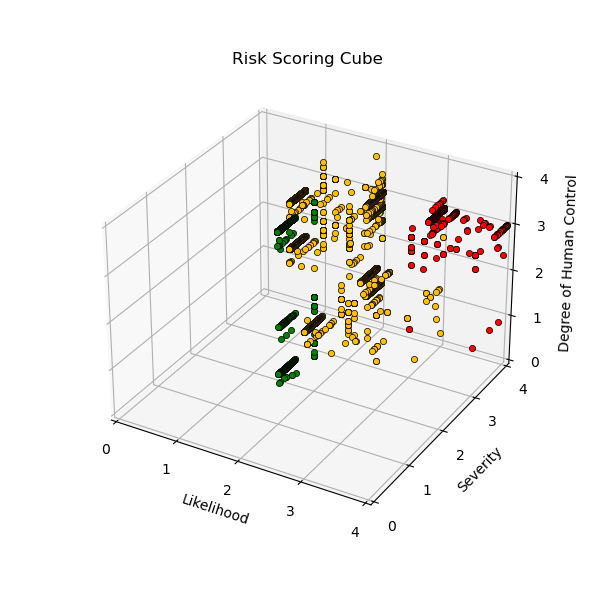

In [41]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])


plt.savefig("3D_Risk_Scoring_Cube.png")

plt.show()